In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # notebook
from datetime import datetime
import seaborn as sns

<IPython.core.display.Javascript object>


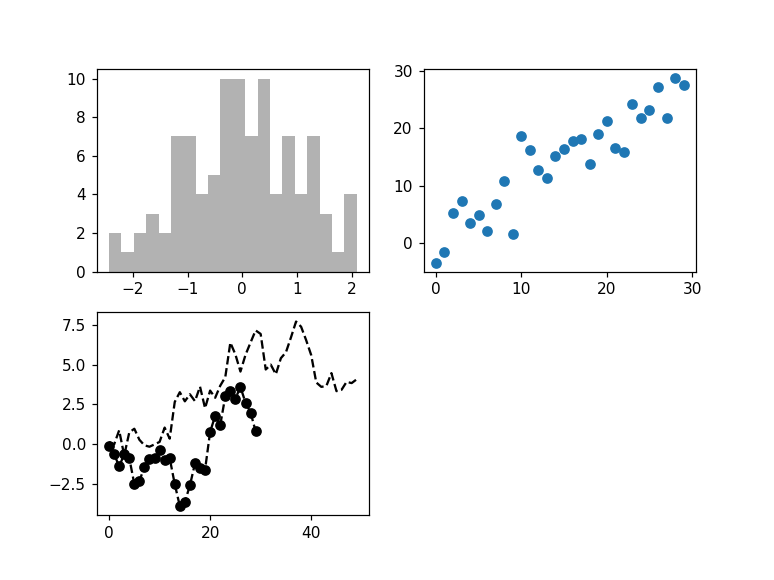

In [2]:
# the plots remain in a Figure object
# we gotta create subplots in the figures with '.add_subplot()' command, telling how many plots we want to create and which ones will be displayed
# the first call of plt.plot writes over the last plot (in this case, plot 3)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

In [3]:
# for using labels in the line points, we use the 'o' parameter

plt.plot(np.random.randn(30).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


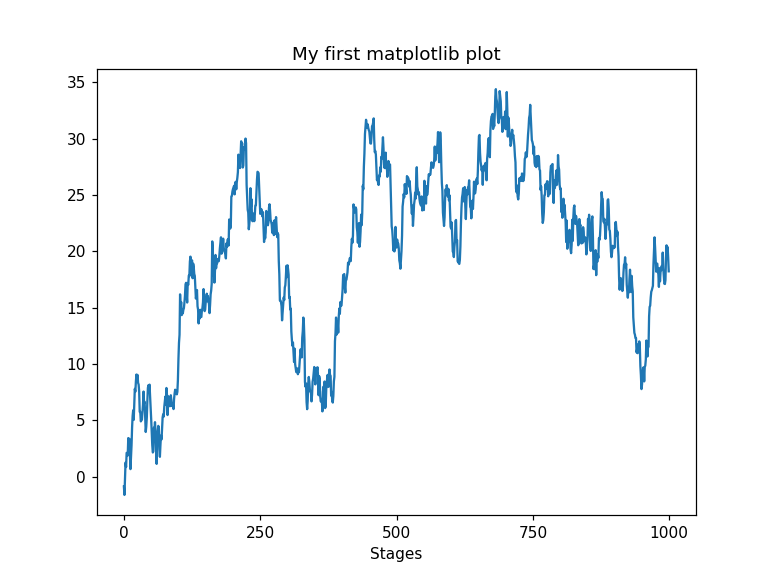

Text(0.5, 0, 'Stages')

In [4]:
# to use legends, we apply the 'legend' and the labels parameters

fig0 = plt.figure()
ax = fig0.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
#                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

<IPython.core.display.Javascript object>


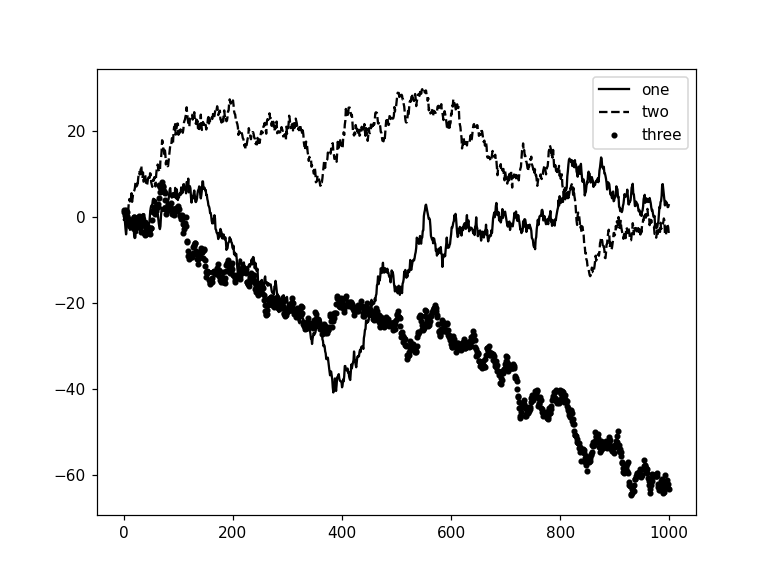

In [5]:
# if we wanna add a legend to the chart, we must add labels and the legend in the plot
# the 'best' attribute in the location of the legend puts the legends in the best position for visualization
# to ommit specific labels we outta not to put the labels on it

fig1 = plt.figure(); ax = fig1.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

<IPython.core.display.Javascript object>


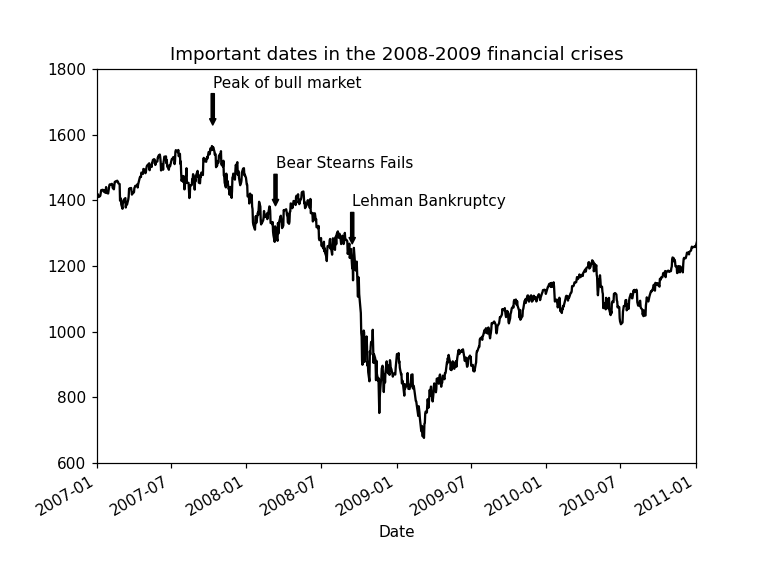

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crises')

In [6]:
# notes and draws in a subplot with annote()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data =pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
             xytext=(date, spx.asof(date) + 225),
             arrowprops=dict(facecolor='black', headwidth=4, width=2,
                            headlength=4),
             horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crises')

<IPython.core.display.Javascript object>


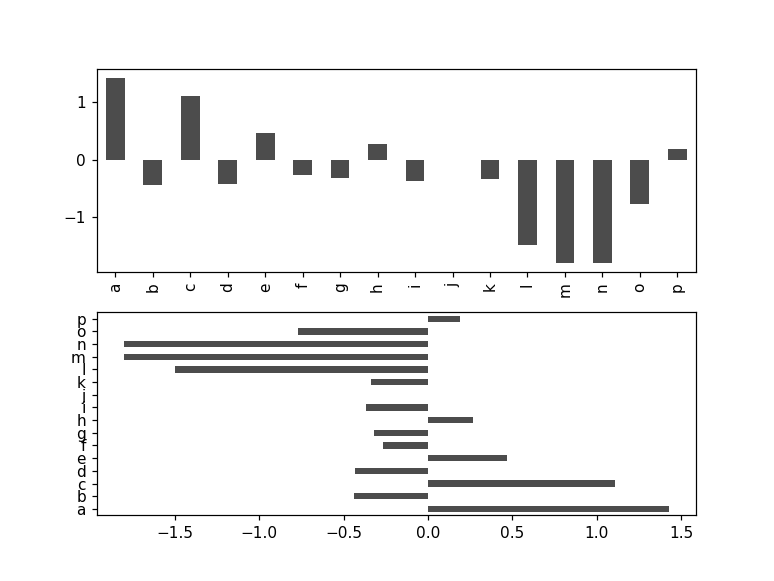

<AxesSubplot:>

In [7]:
# plotting with pandas and seaborn

# bar plot

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7) # barh creates a horizontal bar chart

<IPython.core.display.Javascript object>


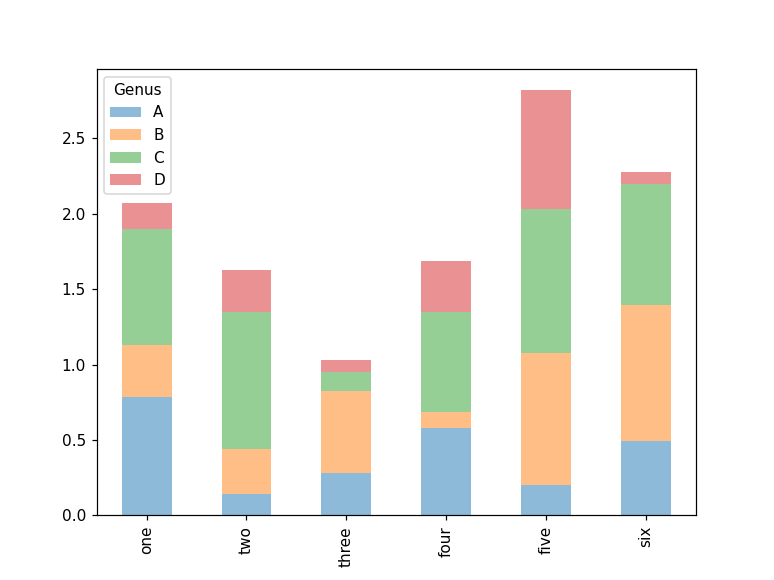

<AxesSubplot:>

In [8]:
# when there're several variables, plot() creates automatically the legend

df = pd.DataFrame(np.random.rand(6, 4), 
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=['A', 'B', 'C', 'D'])

df.columns.name = 'Genus'
# df.plot.bar()
df.plot.bar(stacked=True, alpha=0.5)

<IPython.core.display.Javascript object>


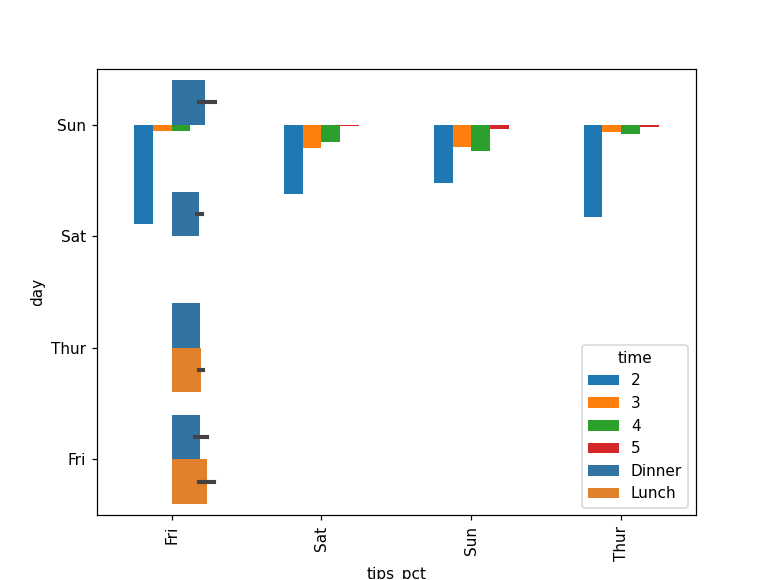

<AxesSubplot:xlabel='day'>

In [9]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.loc[:, 2:5]
party_pct = party_counts.div(party_counts.sum(1), axis=0)
party_pct.plot.bar()

In [10]:
tips['tips_pct'] = tips['tip'] / (tips['total_bill'] -  tips['tip'])
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

<IPython.core.display.Javascript object>


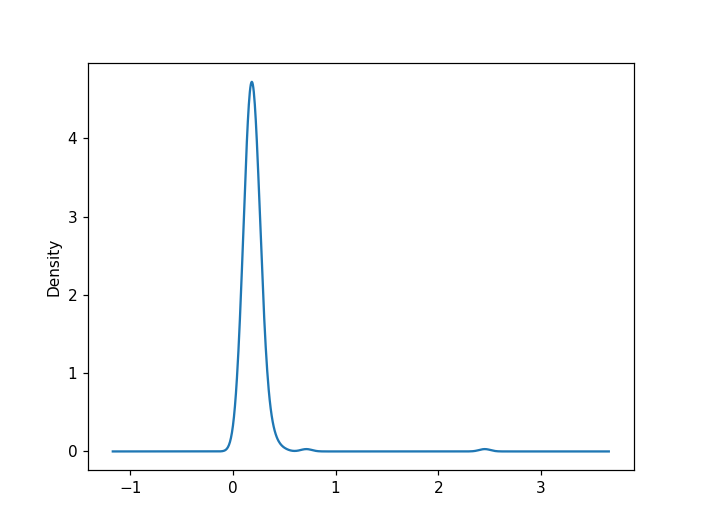

<AxesSubplot:ylabel='Density'>

In [28]:
# histograms and density plots

# tips['tips_pct'].plot.hist(bins=50)
tips['tips_pct'].plot.density()


/home/arthur/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


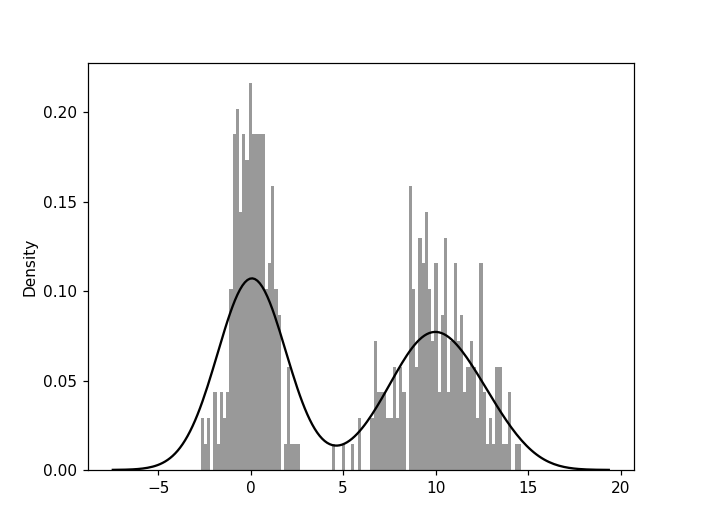

<AxesSubplot:ylabel='Density'>

In [36]:
# distplot do sns gera plotagens ainda mais facilmente

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

/home/arthur/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


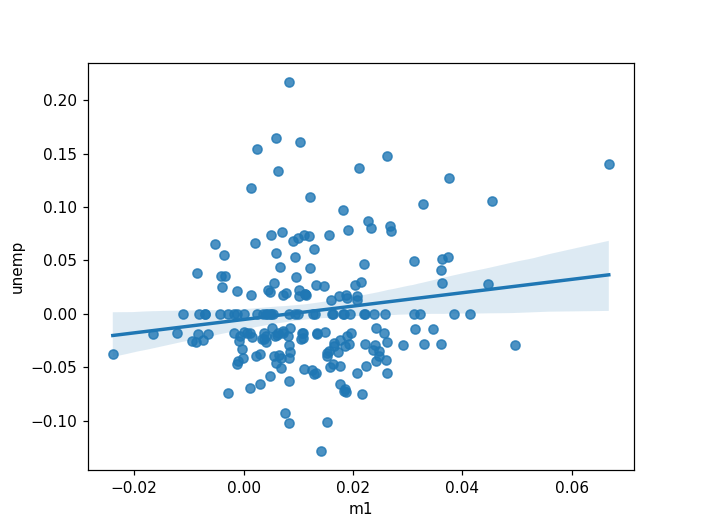

<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [39]:
# plotagens de dispersão

macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

sns.regplot('m1', 'unemp', data=trans_data)

/home/arthur/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


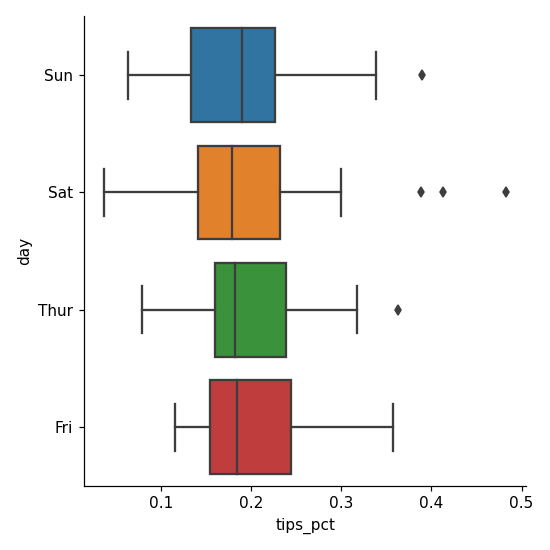

In [45]:
# categorical data

sns.factorplot(x='tips_pct', y='day', kind='box',
              data=tips[tips.tips_pct < 0.5])